##  Retreive FHIR Step Count Observations and calculate the daily, weekly and monthly step counts

1. Load step count data as FHIR Observations from OMH Shimmer FitBit data.
1. Create a Panda Dataframe
    1. Options:
        1. Fetch FHIR Observations as GraphQL flattened data and convert - todo
        1. Convert FHIR Search Bundle to a Panda Dataframe
1. sum values by day, week, and month and create a graph


In [3]:
from pathlib import Path 
from json import dumps,loads
from pandas import *
from requests import get, post
from IPython.display import display as Display,HTML
from pyfhir2 import pyfhir
from fhir_model_generator.model import bundle

ref_server ='http://hapi.fhir.org/baseR4'
#ref_server ='http://hapi.fhir.org/baseR5'
headers1 = {
    'Accept':'application/fhir+json',
    'Content-Type':'application/fhir+json'
    }

headers2 = {
    'Accept':'application/fhir+json',
    'Content-Type':'application/json'
    }

### First lets get a bunch of FHIR Observation data as a FHIR Search Bundle

 - Google fit data converted from OMH to FHIR Observations
 - For starters Just download data from SHIMMER App
   - todo - Directly query from Server

In [4]:
my_path = Path("observation-step-count.json")
obs_stepcounts_json=my_path.read_text()
obs_stepcounts=loads(obs_stepcounts_json)
#obs_stepcount_pyfhir = bundle.Bundle(obs_stepcount)
#obs_stepcount_pyfhir
obs_stepcounts

{'resourceType': 'Bundle',
 'type': 'searchset',
 'total': 10202,
 'entry': [{'resource': {'resourceType': 'Observation',
    'meta': {'profile': ['http://www.fhir.org/mfhir/StructureDefinition/omh_fhir_profile_quantitative_observation']},
    'identifier': [{'system': 'https://omh.org/shimmer/ids',
      'value': '620570d7-91c6-4306-bfc9-df0a5b9d00e2'}],
    'status': 'unknown',
    'category': [{'coding': [{'system': 'http://hl7.org/fhir/observation-category',
        'code': 'physical-activity',
        'display': 'Physical Activity'}]}],
    'code': {'coding': [{'system': 'http://loinc.org',
       'code': '55423-8',
       'display': 'Number of steps in unspecified time.'}]},
    'subject': {'identifier': {'system': 'https://omh.org/shimmer/patient_ids'}},
    'effectivePeriod': {'start': '2020-01-19T00:51:43.354684375Z',
     'end': '2020-01-19T00:52:43.354684375Z'},
    'issued': '2020-03-19T18:13:41.424Z',
    'valueQuantity': {'value': 7,
     'unit': 'steps',
     'system': '

### For each entry flatten and create dataframe for each row

In [5]:
from pandas.io.json import json_normalize
from flatten_json import flatten_json as squash
df = DataFrame()
for obs_stepcount in obs_stepcounts['entry']:
    #print(f':fhir_obs.resource.id={obs_stepcount['resource']['identifier']}')
    flat_fhir_obs = squash(obs_stepcount['resource'])
    df = df.append(json_normalize(flat_fhir_obs), ignore_index=True)   
df.head()

,resourceType,meta_profile_0,identifier_0_system,identifier_0_value,status,category_0_coding_0_system,category_0_coding_0_code,category_0_coding_0_display,code_coding_0_system,code_coding_0_code,code_coding_0_display,subject_identifier_system,effectivePeriod_start,effectivePeriod_end,issued,valueQuantity_value,valueQuantity_unit,valueQuantity_system,valueQuantity_code
0,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,620570d7-91c6-4306-bfc9-df0a5b9d00e2,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19T00:51:43.354684375Z,2020-01-19T00:52:43.354684375Z,2020-03-19T18:13:41.424Z,7,steps,http://unitsofmeasure.org,{steps}
1,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,1aef8a68-f567-4e6c-8b50-77cd090e2cf2,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19T00:52:43.354684375Z,2020-01-19T00:53:11.633514059Z,2020-03-19T18:13:41.424Z,26,steps,http://unitsofmeasure.org,{steps}
2,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,b8bafc7f-15a3-4dc0-9bab-29c8485d790c,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19T00:53:11.633514059Z,2020-01-19T00:53:53.195196979Z,2020-03-19T18:13:41.424Z,6,steps,http://unitsofmeasure.org,{steps}
3,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,ce21a4d7-a94b-4efc-a011-ab14dc288278,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19T00:53:53.195196979Z,2020-01-19T00:54:52.878581453Z,2020-03-19T18:13:41.424Z,66,steps,http://unitsofmeasure.org,{steps}
4,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,6f1c01af-e2fe-471e-846b-9e143268d9ba,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19T00:54:52.878581453Z,2020-01-19T00:55:07.913869474Z,2020-03-19T18:13:41.424Z,19,steps,http://unitsofmeasure.org,{steps}


In [4]:
df.dtypes

resourceType                   object
meta_profile_0                 object
identifier_0_system            object
identifier_0_value             object
status                         object
category_0_coding_0_system     object
category_0_coding_0_code       object
category_0_coding_0_display    object
code_coding_0_system           object
code_coding_0_code             object
code_coding_0_display          object
subject_identifier_system      object
effectivePeriod_start          object
effectivePeriod_end            object
issued                         object
valueQuantity_value             int64
valueQuantity_unit             object
valueQuantity_system           object
valueQuantity_code             object
dtype: object

### Convert effectivePeriod to datetime object

In [5]:
df.effectivePeriod_start = to_datetime(df.effectivePeriod_start)
df.effectivePeriod_end = to_datetime(df.effectivePeriod_end)
df.issued = to_datetime(df.issued)
df.dtypes

resourceType                                object
meta_profile_0                              object
identifier_0_system                         object
identifier_0_value                          object
status                                      object
category_0_coding_0_system                  object
category_0_coding_0_code                    object
category_0_coding_0_display                 object
code_coding_0_system                        object
code_coding_0_code                          object
code_coding_0_display                       object
subject_identifier_system                   object
effectivePeriod_start          datetime64[ns, UTC]
effectivePeriod_end            datetime64[ns, UTC]
issued                         datetime64[ns, UTC]
valueQuantity_value                          int64
valueQuantity_unit                          object
valueQuantity_system                        object
valueQuantity_code                          object
dtype: object

In [6]:
df.head()

,resourceType,meta_profile_0,identifier_0_system,identifier_0_value,status,category_0_coding_0_system,category_0_coding_0_code,category_0_coding_0_display,code_coding_0_system,code_coding_0_code,code_coding_0_display,subject_identifier_system,effectivePeriod_start,effectivePeriod_end,issued,valueQuantity_value,valueQuantity_unit,valueQuantity_system,valueQuantity_code
0,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,620570d7-91c6-4306-bfc9-df0a5b9d00e2,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19 00:51:43.354684375+00:00,2020-01-19 00:52:43.354684375+00:00,2020-03-19 18:13:41.424000+00:00,7,steps,http://unitsofmeasure.org,{steps}
1,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,1aef8a68-f567-4e6c-8b50-77cd090e2cf2,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19 00:52:43.354684375+00:00,2020-01-19 00:53:11.633514059+00:00,2020-03-19 18:13:41.424000+00:00,26,steps,http://unitsofmeasure.org,{steps}
2,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,b8bafc7f-15a3-4dc0-9bab-29c8485d790c,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19 00:53:11.633514059+00:00,2020-01-19 00:53:53.195196979+00:00,2020-03-19 18:13:41.424000+00:00,6,steps,http://unitsofmeasure.org,{steps}
3,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,ce21a4d7-a94b-4efc-a011-ab14dc288278,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19 00:53:53.195196979+00:00,2020-01-19 00:54:52.878581453+00:00,2020-03-19 18:13:41.424000+00:00,66,steps,http://unitsofmeasure.org,{steps}
4,Observation,http://www.fhir.org/mfhir/StructureDefinition/...,https://omh.org/shimmer/ids,6f1c01af-e2fe-471e-846b-9e143268d9ba,unknown,http://hl7.org/fhir/observation-category,physical-activity,Physical Activity,http://loinc.org,55423-8,Number of steps in unspecified time.,https://omh.org/shimmer/patient_ids,2020-01-19 00:54:52.878581453+00:00,2020-01-19 00:55:07.913869474+00:00,2020-03-19 18:13:41.424000+00:00,19,steps,http://unitsofmeasure.org,{steps}


### Plot cumulative values by date

In [7]:
%matplotlib inline

In [8]:
df.dtypes

resourceType                                object
meta_profile_0                              object
identifier_0_system                         object
identifier_0_value                          object
status                                      object
category_0_coding_0_system                  object
category_0_coding_0_code                    object
category_0_coding_0_display                 object
code_coding_0_system                        object
code_coding_0_code                          object
code_coding_0_display                       object
subject_identifier_system                   object
effectivePeriod_start          datetime64[ns, UTC]
effectivePeriod_end            datetime64[ns, UTC]
issued                         datetime64[ns, UTC]
valueQuantity_value                          int64
valueQuantity_unit                          object
valueQuantity_system                        object
valueQuantity_code                          object
dtype: object

In [23]:
plot_me = df.loc[:,["effectivePeriod_start", "valueQuantity_value"]]

plot_me.head(), plot_me.shape

(                effectivePeriod_start  valueQuantity_value
 0 2020-01-19 00:51:43.354684375+00:00                    7
 1 2020-01-19 00:52:43.354684375+00:00                   26
 2 2020-01-19 00:53:11.633514059+00:00                    6
 3 2020-01-19 00:53:53.195196979+00:00                   66
 4 2020-01-19 00:54:52.878581453+00:00                   19, (10202, 2))

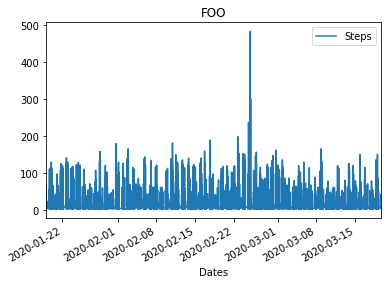

In [24]:
plot_me.rename(columns={"effectivePeriod_start": "Dates", "valueQuantity_value": "Steps"}).plot(
    x='Dates',
    y='Steps',
    kind='line',
    title = "FOO",
    legend = True,
    sharex =  True,
    )

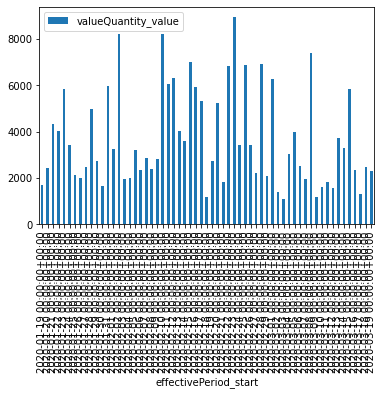

In [57]:
cum_results.plot.bar()

In [58]:
cum_results = cum_results_week.loc[~(cum_results_week==0).all(axis=1)]  # show only non-zero values
cum_results.head()

,valueQuantity_value
effectivePeriod_start,
2020-01-19 00:00:00+00:00,1704
2020-01-26 00:00:00+00:00,24205
2020-02-02 00:00:00+00:00,29330
2020-02-09 00:00:00+00:00,17618
2020-02-16 00:00:00+00:00,41077


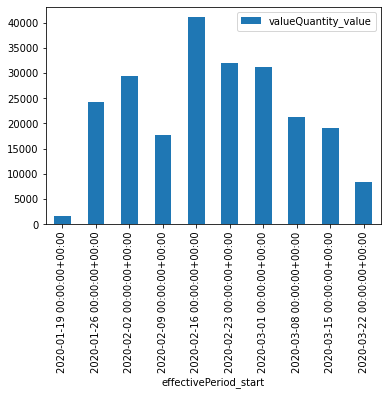

In [59]:
cum_results.plot.bar()

In [60]:
cum_results = cum_results_month.loc[~(cum_results_month==0).all(axis=1)]  # show only non-zero values
cum_results.head()

,valueQuantity_value
effectivePeriod_start,
2020-01-31 00:00:00+00:00,43762
2020-02-29 00:00:00+00:00,127245
2020-03-31 00:00:00+00:00,55103


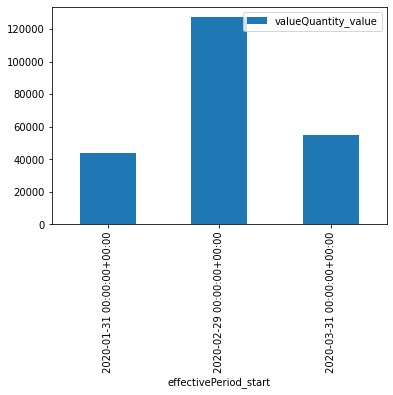

In [61]:
cum_results.plot.bar()